# Fundamentals of Data Analysis - Project

**Author: Cecilia Pastore**

---

<details>
    <summary> Project assignement </summary>

>1. Analyse CO2 vs Temperature Anomaly from 800kyrs – present.
>2. Examine one other (paleo/modern) features (e.g. CH4 or polar ice-coverage)
>3. Examine Irish context:
>    o Climate change signals: (see Maynooth study: The emergence of a climate change signal in long-term Irish >meteorological observations - ScienceDirect)
>4. Fuse and analyse data from various data sources and format fused data set as a pandas dataframe and export to csv and json formats
>5. For all of the above variables, analyse the data, the trends and the relationships between them (temporal leads/lags/>frequency analysis).
>6. Predict global temperature anomaly over next few decades (synthesise data) and compare to published climate models if >atmospheric CO2 trends continue
>7. Comment on accelerated warming based on very latest features (e.g. temperature/polar-icecoverage)
>
>Use a Jupyter notebook for your analysis and track your progress using GitHub.
>
>Use an academic referencing style


## 1. Import the needed libraries for the project

As first, we will need to import all the libraries that will be needed for the dataaset. 

Here the libraries imported:

- [pandas (pd)[]](https://pandas.pydata.org/): Data manipulation and analysis library. Provides data structures like DataFrame and Series for efficient data handling.
- [seaborn (sns)[]](https://seaborn.pydata.org/): Statistical data visualization library. Enhances Matplotlib visualizations with appealing styles and themes.
- [matplotlib.pyplot (plt)[]](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html): Plotting library for creating static, interactive, and animated visualizations. Offers a wide range of plot types and customization options.
- [numpy (np)[]](): Numerical computing library for large, multi-dimensional arrays and matrices. Supports mathematical functions for array operations.
- [datetime (dt)[]](https://docs.python.org/3/library/datetime.html): Module for working with dates and times. Provides classes for representing and manipulating dates and times.
- [scikit-learn (from sklearn)[]](https://scikit-learn.org/):  Machine learning library. Provides tools for data analysis, modeling, and machine learning algorithms.
- [LinearRegression (from sklearn.linear_model)[]](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html): Linear regression model implementation in scikit-learn. Fits a linear model to the training data and makes predictions.
- [train_test_split (from sklearn.model_selection)[]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html): Function for splitting datasets into training and testing sets.
- [metrics (from sklearn)[]](https://scikit-learn.org/stable/modules/model_evaluation.html): Module containing various metrics for evaluating model performance.

In [84]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import metrics

## 2. CO2 

The purpose of this section is to compile a dataset spanning 800,000 years ago to the present, illustrating the levels of carbon dioxide per million by volume (p.p.m.v.) throughout this historical era.

### 2.1 CO2 - Bereiter et al. (2014)

The initial dataset, provided by the lecture, it derive from [Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.[]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL061957).

This dataset is a revised version of the EPICA Dome C CO2 record covering the period from 800 to 600 thousand years before the present  (that will be presented further in the project). It offers insights into the composition of the atmosphere during the ancient era, ranging from 800,000 years ago until more precise measurement data became available. The dataset derives CO2 concentrations trapped in ice cores from Antarctica. As a revision of the EPICA Dome C CO2 dataset, it reassesses the oldest segment of the EDC CO2 record using distinct air extraction methods and sections of the core.


The dataset chronologies is expressed in **ECD3** before present year where present year, for the dataset, is 1950 [[]](https://cp.copernicus.org/articles/3/485/2007/cp-3-485-2007.pdf). 

First we are gonna to import the dataset. The dataset has been provided by the lecture and saved in the subfolder data **grl52461-sup-0003-supplementary** and, for the porpuse of this project, will be called **Bereiter**.

The dataset will be importer as a pandas dataframe using [.read_exceel[]](https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/) from the sheet **CO2 Composite**. Further on, the dataset format is fixed selecting the relevant data, resetting the index [[]](https://datagy.io/pandas-drop-index-column/), assign column name [[]](https://saturncloud.io/blog/how-to-set-column-headers-to-the-first-row-in-a-pandas-dataframe-a-comprehensive-guide/) and removing the first empty row.

In [85]:
# Read data from Bereiter dataset
# Source: https://sparkbyexamples.com/pandas/pandas-read-excel-multiple-sheets-in-pandas/
bereiter_df = pd.read_excel('data\co2\grl52461-sup-0003-supplementary.xls', sheet_name='CO2 Composite')

# Create a subset of the DataFrame (selecting all rows starting from the 14th row and all columns)
# Source: https://datagy.io/pandas-drop-index-column/
ber_df = bereiter_df.iloc[13:]

# Reset the index and drop the previous index column
ber_df = ber_df.reset_index(drop=True)

# Use the first row as headers
# Source: https://saturncloud.io/blog/how-to-set-column-headers-to-the-first-row-in-a-pandas-dataframe-a-comprehensive-guide/
ber_df.columns = ber_df.iloc[0]

# Drop the first row (header row)
ber_df = ber_df.iloc[1:]


The dataset's datatype has been standardized to float to preempt potential issues [[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html). Additionally, leading and trailing spaces in column names have been removed for consistency

In [86]:
# Change the datatype to float64 for the entire DataFrame
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.astype.html
ber_df = ber_df.astype('float64')

# Remove leading and trailing spaces from column names for better consistency
ber_df.columns = ber_df.columns.str.strip()

Now, for clarity, we will create a new column representing the year in the standard format. Additionally, we will adjust the ECD3 chronologies (contained in the 'Gasage (yr BP)' column) to show the present year instead of 1950.

To achieve this, I have utilized the [.today()[]](https://www.askpython.com/python/examples/obtain-current-year-and-month) function from the datetime module.

In [87]:
# Add a new column "Year" to represent the year in the standard date format.
# Define the current year using the date module.
current_year = dt.date.today().year

# Calculate the actual year based on the 'Gasage (yr BP)' column, assuming the present is 1950.
ber_df['Year'] = 1950 - ber_df['Gasage (yr BP)'].astype(int)

# Adjust the 'Gasage (yr BP)' column to express dates as of the current year.
ber_df['ECD3_bp'] = current_year - 1950 + ber_df['Gasage (yr BP)']

# Drop the 'Gasage (yr BP)' column for clarity, as it is no longer needed.
ber_df = ber_df.drop('Gasage (yr BP)', axis=1)

I [reordered[]](https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns) and [sort[]](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) the columns for clarity. Then [duplicate value[]](https://www.statology.org/pandas-find-duplicates/) in the column ECD3_bp are check with no result.

In [88]:
# Reorder columns and rows based on the 'Year' column
# Reference: https://practicaldatascience.co.uk/data-science/how-to-reorder-pandas-dataframe-columns
ber_df = ber_df.reindex(columns=['Year', 'ECD3_bp', 'CO2 (ppmv)', 'sigma mean CO2 (ppmv)'])

# Sort the DataFrame based on the 'Year' column in descending order
# Reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html
ber_df = ber_df.sort_values(by='Year', ascending=False)

# Check for duplicates in the 'ECD3_bp' column
# Reference: https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = ber_df.duplicated(['ECD3_bp'], keep=False)
print(ber_df[duplicate_in_year])

Empty DataFrame
Columns: [Year, ECD3_bp, CO2 (ppmv), sigma mean CO2 (ppmv)]
Index: []


[Missing values[]](https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd) and the [data shape[]](https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape) are printed. The dataframe shows no missing values, indicating consistency, and it is composed of 1904 rows and 4 columns.

In [89]:
# Check for missing values in the dataset
# Reference: https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values:")
print(ber_df.isnull().sum(), "\n")

# Check the shape of the dataset
# Reference: https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows: {ber_df.shape[0]}, Columns: {ber_df.shape[1]}')


Missing Values:
0
Year                     0
ECD3_bp                  0
CO2 (ppmv)               0
sigma mean CO2 (ppmv)    0
dtype: int64 

Dataset Shape:
Rows: 1901, Columns: 4


We can now visualize the data plotting the CO2 concentration against the ECD3 age. For the porpuse i have used the function [.lineplot[]](https://seaborn.pydata.org/generated/seaborn.lineplot.html) from the seaborn library. As a first observation, we can discern a series of cycles indicating fluctuations in CO2 concentration, with a notable acceleration in recent years.

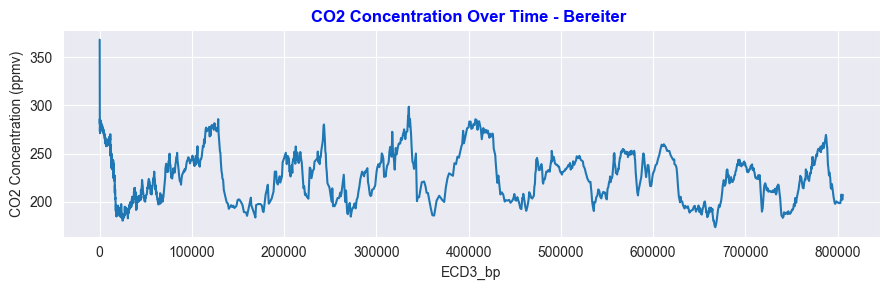

In [90]:
# Plotting CO2 concentration against ECD3_bp

# Set the visual style
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(9, 3))

# Create a line plot
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time - Bereiter ', fontweight='bold', color='blue')

# Improve spacing for better aesthetics
plt.tight_layout()

# Display the plot
plt.show()


### 2.2 CO2 - Luthi et al (2008)

The second dataset has been provided from [Luthi et al (2008) - nature publicathions[a]](https://www.nature.com/articles/nature06949). This dataset is the original version of the previous presented dataset, after revised by: [Bereiter et al. (2014), Revision of the EPICA Dome C CO2 record from 800 to 600 kyr before present, Geophysical Research Letters, doi: 10.1002/2014GL061957.[]](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014GL061957)

As the previous one, the dataset comprehensively spans from 800,000 years before the present era to the modern era, marked by more precise routine atmospheric measurements. As the previous dataset he analysis involved measuring the composition of air trapped in Antarctic ice cores.

The dataset chronologies is again expressed in **ECD3** before present year where present year, for the dataset, is 1950 [[a]](https://cp.copernicus.org/articles/3/485/2007/cp-3-485-2007.pdf). 

First we are gonna to import the dataset. The dataset has been provided by the lecture and saved in the subfolder data **41586_2008_BFnature06949_MOESM31_ESM** and, for the porpuse of this project, will be called IPCC.

in the same way that the previous datset we will perfom the following modification:
1. Imports the dataset from an Excel format.
2. Selects the relevant data.
3. Defines column names.
4. Drops irrelevant rows.
5. Sets data types to float to prevent potential issues.
6. Cleans and trims the columns.
7. Creates a new column expressing age in the common year format for clarity.
8. Adjusts the 'ECD3' chronologies, considering years before the present as the current year.
9. Sorts the columns.

In [91]:
# Read data from the IPCC dataset
ipcc_data_co2 = pd.read_excel('data/co2/41586_2008_BFnature06949_MOESM31_ESM.xls', sheet_name='3.  Composite CO2')

# Create a subset of the DataFrame (excluding metadata rows)
ipcc_df_co2 = ipcc_data_co2.iloc[5:]

# Reset the index for a clean start
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

# Use the first row as headers
ipcc_df_co2.columns = ipcc_df_co2.iloc[0]

# Drop the first row (header row)
ipcc_df_co2 = ipcc_df_co2.iloc[1:]

# Change the datatype to float64 for numerical columns
ipcc_df_co2 = ipcc_df_co2.astype('float64')

# Remove leading and trailing spaces from column names
ipcc_df_co2.columns = ipcc_df_co2.columns.str.strip()

# Define the current year
current_year = dt.date.today().year

# Add a new column "Year" showing the current year based on 'EDC3_gas_a (yr)'
ipcc_df_co2['Year'] = 1950 - ipcc_df_co2['EDC3_gas_a (yr)'].astype(int)

# Fix the 'EDC3_gas_a (yr)' column to express the present as 2023
ipcc_df_co2['EDC3_bp'] = current_year - 1950 + ipcc_df_co2['EDC3_gas_a (yr)']

# Reorder columns with 'Year' as the first column
first_column = ipcc_df_co2.pop('Year') 
ipcc_df_co2.insert(0, 'Year', first_column) 

# Sort the DataFrame based on the 'Year' column in descending order
ipcc_df_co2 = ipcc_df_co2.sort_values(by='Year', ascending=False)

After double checking the duplicate data we can see there are two rows duplicate for the columns EDC3_bp. The duplicate value hare handle averaging the co2 values. 

In [92]:
# check for duplicate in the columns EDC3_bp
duplicate_in_year = ipcc_df_co2.duplicated(['EDC3_bp'], keep=False)
print("Duplicate Value")
print(ipcc_df_co2[duplicate_in_year])

# Group by 'Year' and 'EDC3_bp', then average 'CO2 (ppmv)' to eliminate duplicates
# Note: Line 532 and 531 are duplicate and are combined here to avoid redundancy
ipcc_df_co2 = (
    ipcc_df_co2
    .groupby(['Year', 'EDC3_bp'])['CO2 (ppmv)']
    .mean()
    .reset_index()
    .sort_values(by='Year', ascending=False)
)

Duplicate Value
0      Year  EDC3_gas_a (yr)  CO2 (ppmv)   EDC3_bp
532 -407433         409383.0       274.2  409457.0
531 -407433         409383.0       275.2  409457.0


The index is reset, for better clarity, and missing value are check. the dataset deosn't show missing value. the shape of the dataset is 1095 rows and 3 columns showing less observation than the previous dataset. 

In [93]:
# Resetting the index for a clean start
ipcc_df_co2 = ipcc_df_co2.reset_index(drop=True)

# Checking for missing values
print("Missing Values:")
print(ipcc_df_co2.isnull().sum(), "\n")

# Checking the data shape
print("Dataset Shape:")
print(f'Rows: {ipcc_df_co2.shape[0]}, Columns: {ipcc_df_co2.shape[1]}')

Missing Values:
Year          0
EDC3_bp       0
CO2 (ppmv)    0
dtype: int64 

Dataset Shape:
Rows: 1095, Columns: 3


Finally we can plot the dataframe. from a first view it look to me showing the same trend of the previous one with period cicle and an acceleration on present time.

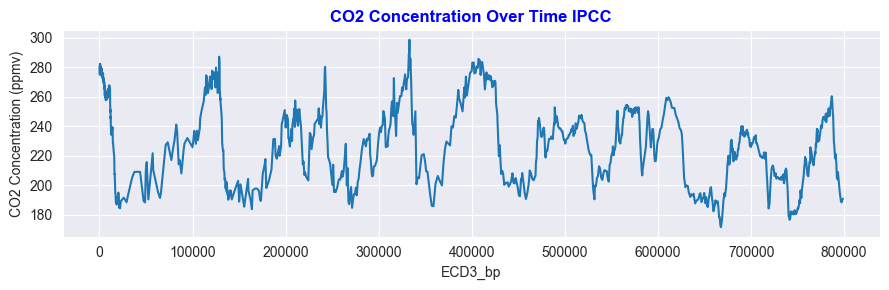

In [94]:
# Plotting CO2 concentration against ECD3_bp

# Set the visual style
sns.set_style("darkgrid")

# Set the figure size
plt.figure(figsize=(9, 3))

# Create a line plot
sns.lineplot(x='EDC3_bp', y='CO2 (ppmv)', data=ipcc_df_co2)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('CO2 Concentration Over Time IPCC', fontweight='bold', color='blue')

# Improve spacing for better aesthetics
plt.tight_layout()

# Display the plot
plt.show()

### 2.3 Comparing the datasets

We can now compare the datasets to choose which one is better suited for constructing the main dataset for CO2 concentration from 800,000 years ago to the modern era. The best way to do that is to plot them together.

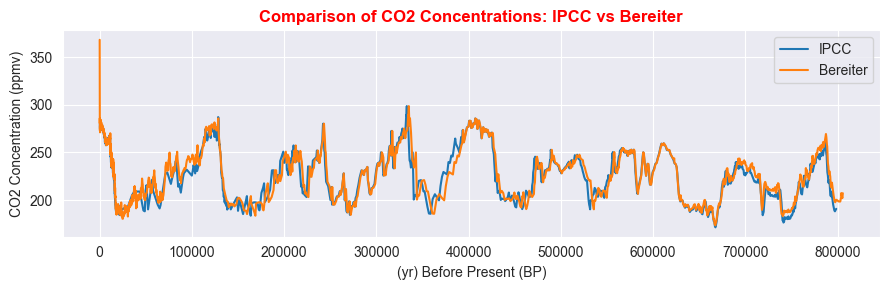

In [95]:
# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create a line plot for IPCC data
sns.lineplot(x='EDC3_bp', y='CO2 (ppmv)', data=ipcc_df_co2, label='IPCC')

# Create a line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='CO2 (ppmv)', data=ber_df, label='Bereiter')

# Add labels and title
plt.xlabel('(yr) Before Present (BP)')
plt.ylabel('CO2 Concentration (ppmv)')
plt.title('Comparison of CO2 Concentrations: IPCC vs Bereiter', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing for better aesthetics
plt.tight_layout()

# Show the plot
plt.show()

From the above, the two datasets look quite similar. This was expected since one of them is derived from the other with revised measurement methodologies. For the purpose of the analysis, I will choose the Bereiter dataset as it contains more observations and is a more recent revision of the other dataset, claiming to be more precise.

But first i will prepare the Bereiter to the fusion removing not needed columns.

In [96]:
# remove last columng of the Bereiter dataser and rename the dataset
co2_df = ber_df.iloc[:, 0:3]

### 2.3 Fusing the dataset on recent years and export on CSV/JASON

The previously examined dataset (Bereiter) has observations until 2001. We need to address the missing years. Following the advice from the lecture, given the challenge of finding directly comparable data, we can utilize global measurements that are not perfectly associated with Antarctica.

As a solution, I have decided to use a modern dataset representing the global mean concentration of CO2. I will calculate the percentage of increase/decrease between consecutive years in this global dataset. Subsequently, I will apply these percentages to the missing years in the Bereiter dataset to simulate CO2 concentrations.

The recent observation are contained in dataset called **co2_annmean_mlo** provided by [NOAA GML DATA []](https://www.noaa.gov/). The dataset show global co2 concentration from the 1959 to 2022.

We will first import the dataset and perform the necessary manipulations to calculate the percentage increase/decrease of values from the previous year for the years 2002 to 2022

In [97]:
# Import global CO2 mean rates in the modern era
# Data has been downloaded from the website https://gml.noaa.gov/ccgg/trends/gl_data.html and added as a CSV in the repository
global_co2_moana = pd.read_csv('data\co2\co2_annmean_mlo.csv')

# Remove unnecessary columns
global_co2_moana = global_co2_moana.iloc[:, 0:2]

# Reset the index for a clean start
global_co2_moana = global_co2_moana.reset_index(drop=True)

# Keep only rows with values from 1954 onwards
global_co2_moana = global_co2_moana.iloc[43:, :]

# Reset the index columns
global_co2_moana = global_co2_moana.reset_index(drop=True)

# Set up column names
global_co2_moana.columns = ["Year", "CO2 (ppm)"]

# Convert the 'CO2 (ppm)' column to 'float64'
global_co2_moana['CO2 (ppm)'] = global_co2_moana['CO2 (ppm)'].astype('float64')

# Convert the 'Year' column to 'int64'
global_co2_moana['Year'] = global_co2_moana['Year'].astype('int64')

# Create a lagged column 'co2_lag(1)' to store the CO2 concentration from the previous year
global_co2_moana['co2_lag(1)'] = global_co2_moana['CO2 (ppm)'].shift(1)

Now the % of increase/decrease of each year compared to the previous one is calculate and added in a [new column[]](https://vitalflux.com/pandas-dataframe-how-to-add-rows-columns/).

In [98]:
# calculate increase percentage of co2 for modern era in the moana dataset 

# define current year and last year variable 
current_year_co2 = global_co2_moana['CO2 (ppm)']
previous_year_co2 = global_co2_moana['co2_lag(1)']

# create increase column    
global_co2_moana['%_increase'] = (current_year_co2-previous_year_co2) / previous_year_co2

Finally, the following effectively extends the DataFrame co2_df by adding rows for the years 2002 to 2022 based on the percentage increase in CO2 concentration obtained from the global dataset. The dataset is then sorted for clarity.

In [99]:
# Define the current year using the datetime module
current_year = dt.date.today().year

# Loop through the years from 2002 to 2022
for i in range(2002, 2023):
    # Calculate the 'ECD3_bp' (age in years before present) for the current year
    y = current_year - i
    # Calculate the previous year
    x = i - 1
    # Retrieve the CO2 concentration for the previous year from the existing DataFrame 'co2_df'
    previous_year = co2_df.loc[co2_df["Year"] == x, 'CO2 (ppmv)']
    # Retrieve the percentage increase in CO2 concentration for the current year from the global dataset
    increase = global_co2_moana.loc[global_co2_moana["Year"] == i, "%_increase"].values[0]
    # Calculate the CO2 concentration for the current year based on the percentage increase
    co2 = previous_year * (1 + increase)
    # Create a new row as a DataFrame
    new_row = pd.DataFrame({'Year': i, 'ECD3_bp': y, 'CO2 (ppmv)': co2})
    # Concatenate the new row with the existing DataFrame 'co2_df'
    co2_df = pd.concat([co2_df, new_row], ignore_index=True)
    
# sort by year and reset index 
co2_df = co2_df.sort_values(by='Year', ascending=False).reset_index(drop=True)

The dataset is exported as a [CSV []](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) and [Jason []](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html) and placed in the folder export/co2-temp-ch4 folder. 

In [100]:
# Export to CSV
co2_df.to_csv('export\co2-temp-ch4\co2_dataset.csv', index=False)

# Export to JSON
co2_df.to_json('export\co2-temp-ch4\co2_dataset.json', orient='records')

## 3. Temprature Anomaly 

The second variable to be examined from 800,000 years ago until the present is the temperature. For this purpose, two datasets have been provided. This section will analyze them and create a fused dataset to be used for the analysis.

### 3.1 - Jouzel dataset

The first dataset, provided by the lecture, for the porpuse of this project called **Jouzel** dataset, is from: [Jouzel, Jean; Masson-Delmotte, Valerie (2007): EPICA Dome C Ice Core 800KYr deuterium data and temperature estimates. PANGAEA, https://doi.org/10.1594/PANGAEA.683655. []](https://doi.pangaea.de/10.1594/PANGAEA.683655)

The dataset contains an estimation of temperature anomalies from 800,000 years up to modern times. 

A temperature anomaly refers to the deviation of a temperature measurement from a long-term average for a specific location and period. Instead of presenting absolute temperature values, anomalies represent the difference between the observed temperature and the expected or average temperature for that location and time.

In the case of the Jouzel dataset, temperature anomalies are calculated as the difference between the temperature and the average of the last 1000 years.

It uses the same ECD3 chronologies from 800,000 years before the present, where the present year in the dataset is set as 1950. 

The file is in a txt format. We will first import it in a pandas dataframe [[]](https://www.geeksforgeeks.org/convert-text-file-to-csv-using-python-pandas/) [[]](https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas), select the relevant columns [[]](https://www.statology.org/pandas-keep-columns/) and format the relevant data to be used. 

In [101]:
# Read temperature data from a text file into a DataFrame
# Source: https://www.geeksforgeeks.org/convert-text-file-to-csv-using-python-pandas/
#         https://stackoverflow.com/questions/19632075/how-to-read-file-with-space-separated-values-in-pandas
jouzel_temperature = pd.read_csv("data\Temperature\edc3deuttemp2007.txt", skiprows=91, sep='\s+')

# Remove unnecessary columns for better clarity
# Reference: https://www.statology.org/pandas-keep-columns/
jouzel_temperature = jouzel_temperature[['Age', 'Temperature']]

# Rename columns for improved clarity
columns_to_rename = ['ECD3_age', 'temp_anomaly']
jouzel_temperature.columns = columns_to_rename

We can now check missing value and the shape of the dataset. The dataset contains 5800 rows and 2 columns. Missing value are present but, due to the limitated number, they are adressed [dropping the rows []](https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe) containing missing values. 

In [102]:
# Checking missing values
print("Missing Values")
print(jouzel_temperature.isnull().sum(), "\n")

# Checking data shape
print("Dataset Shape:")
print(f'Rows {jouzel_temperature.shape[0]}, Columns: {jouzel_temperature.shape[1]}')

Missing Values
ECD3_age         0
temp_anomaly    15
dtype: int64 

Dataset Shape:
Rows 5800, Columns: 2


In [103]:
# drop row with null values
# Reference: https://www.digitalocean.com/community/tutorials/pandas-dropna-drop-null-na-values-from-dataframe
jouzel_temperature = jouzel_temperature.dropna()

The dataset doesn't show any duplicated value.

In [104]:
# check for duplicate in the columns Gasage (yr BP)
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = jouzel_temperature.duplicated(['ECD3_age'], keep=False)
print("Duplicate Value")
print(jouzel_temperature[duplicate_in_year])

Duplicate Value
Empty DataFrame
Columns: [ECD3_age, temp_anomaly]
Index: []


Two new columns "Year" and ECD3_bp are set. The first will show the year in the usual format and the second will refer the year as year before present where present is the current year. 
We will then drop a redundant column and reorder them for better clarity. 

In [105]:
# Define the current year
current_year = dt.date.today().year

# Add a column 'ECD3_bp' based on the age, with years before present equal to 2023
jouzel_temperature['ECD3_bp'] = current_year - 1950 + jouzel_temperature['ECD3_age']

# Add a column 'Year' to represent the reference year
jouzel_temperature['Year'] = (current_year - jouzel_temperature['ECD3_bp']).astype(int)

# Drop the redundant column 'ECD3_age' and reorder the columns of the dataset
jouzel_temperature = jouzel_temperature[['Year', 'ECD3_bp', 'temp_anomaly']]

### 3.2 - NOAA_temperature

referred to as the noaa_temperature dataset for the purpose of this project, displays absolute temperature estimates from 800,000 years before the present (where the present is defined as 1950).

It appears to contain the same data as the previous dataset, presenting observations on absolute temperature rather than anomalies.

To verify this, I will manually calculate the temperature anomalies (considering the average over a 1000-year period of the dataframe) and then compare the two datasets to decide how to extrapolate the final temperature anomalies dataset.

As a first step, we need to import the dataset, remove columns that are not relevant for the analysis, check for duplicate and missing values, and examine the shape of the dataset. The dataframe doesn't contain any duplicates or missing values and has 5819 rows and 2 columns.

In [106]:
# Import NOAA temperature data 
noaa_temperature = pd.read_excel('data\Temperature\epicaDC.deuttemp.EDC3-AICC (3).xls', 
                                   sheet_name='epicaDC.deuttemp.EDC3-AICC.txt')

# Keep only relevant columns indicating the age and the temperature 
noaa_temperature = noaa_temperature[['EDC3béta', 'temp']]

# Check for duplicates in the column 'EDC3béta'
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = noaa_temperature.duplicated(['EDC3béta'], keep=False)
print("Duplicate Values")
print(noaa_temperature[duplicate_in_year], "\n")
# Checking missing values
# https://medium.com/analytics-vidhya/python-finding-missing-values-in-a-data-frame-3030aaf0e4fd
print("Missing Values")
print(noaa_temperature.isnull().sum(), "\n")

# Checking data shape
# https://stackoverflow.com/questions/58008120/how-to-use-format-in-python-to-print-out-the-data-shape
print("Dataset Shape:")
print(f'Rows {noaa_temperature.shape[0]}, Columns: {noaa_temperature.shape[1]}')

Duplicate Values
Empty DataFrame
Columns: [EDC3béta, temp]
Index: [] 

Missing Values
EDC3béta    0
temp        0
dtype: int64 

Dataset Shape:
Rows 5819, Columns: 2


The "Year" and "ECD3_bp" column are added. Column "ECD3_bp" will show the years before present considering as year the current year. Redundant columns are dropped and the dataframe is reorded for clarity. 

The temperature is then changed from celsius to kelvin sotracting - 273.15.

In [107]:
# Add a column taking the year before the present as the current year
noaa_temperature['ECD3_bp'] = current_year - 1950 + noaa_temperature['EDC3béta']

# Add a column 'Year' to represent the reference year
noaa_temperature['Year'] = (current_year - noaa_temperature['ECD3_bp']).astype(int)

# Change the temperature column from Kelvin to Celsius
noaa_temperature['temp'] = noaa_temperature['temp'] - 273.15

# Drop the redundant column 'EDC3béta'
noaa_temperature = noaa_temperature.drop(columns='EDC3béta')

# Reorder columns in the DataFrame
noaa_temperature = noaa_temperature[['Year', 'ECD3_bp', 'temp']]


In [108]:
noaa_temperature

,Year,ECD3_bp,temp
0,2000,24.00000,-54.85
1,1993,30.44023,-54.85
2,1987,36.55981,-54.85
3,1981,42.35844,-54.85
4,1974,49.44722,-54.85
...,...,...,...
5814,-814921,816945.60000,-62.15
5815,-815743,817767.60000,-61.95
5816,-816555,818579.50000,-61.85
5817,-817353,819377.10000,-61.75


We can now manually calculate the temperature anomaly as the difference from the 1000-year average to match the one of the previus dataset.

In [109]:
# Calculate the temperature anomaly 
# Calculate the mean of approximately the last 1000 years, excluding added lines
mean_noaa = noaa_temperature['temp'][12:226].mean()

# Create a temperature anomaly column 
noaa_temperature['temp_anomaly'] = noaa_temperature['temp'] - mean_noaa

### 3.3 Comparing the dataset 

We can now check for discrepancies in temperature anomalies by plotting the two datasets together.

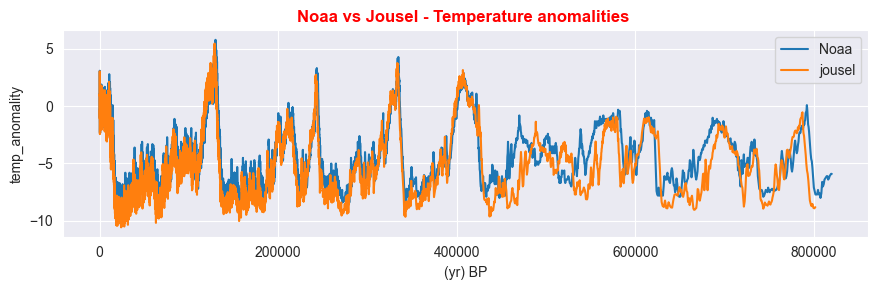

In [110]:
# plot the 2 dataset toghethere to determinate what to use 

# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create the line plot for noaa temp data
sns.lineplot(x='ECD3_bp', y='temp_anomaly', data=noaa_temperature, label='Noaa')

# Create the line plot for Bereiter data
sns.lineplot(x='ECD3_bp', y='temp_anomaly', data=jouzel_temperature, label='jousel')

# Add labels and title
plt.xlabel('(yr) BP')
plt.ylabel('temp_anomality')
plt.title('Noaa vs Jousel - Temperature anomalities ', fontweight='bold', color='red')

# Add legend
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

Examining the graph, it appears that both datasets have similar temperature anomalies until around 40,000 years before the present, and afterward, they exhibit some discrepancies, although the overall trend remains consistent.

I assume the discrepancies arise from the challenges of obtaining accurate observations for ancient times and variations in how the 1000-year average for temperature anomalies is calculated.

Both datasets have a similar size, but the Jouzel dataset includes data up to 1911, in contrast to the NOAA dataset, which extends to the year 2000. Since the sizes of the two datasets are comparable, and the results for the first 40,000 years before the present are similar, I have decided to keep the Jouzel dataset. It already includes calculated anomalies, making it more reliable. Additionally, I will append the years from 1911 to 2000 from the Jouzel dataset.

### 3.4 Adding the recent years. 

Before to fuse the two dataset toghether I need to add the year from 2000 to 2022 to the jouzel dataset.

For recent years, I've come across multiple online datasets that depict temperature anomalies. However, each of them employs a distinct time frame, typically from 1951 to 1980, as the reference period for calculating anomalies. Additionally, some datasets are specific to global temperatures and don't refer to the same area of the other dataset.This will calculate a discrepency that make not possible use them to fulfill the present years. Example are [here []](https://www.temperaturerecord.org/#sources)) and [here []](https://berkeleyearth.org/temperature-region/antarctica) This will calculate a discrepency.

The only data I was able to find was sourced [here []](https://en.tutiempo.net/climate/ws-898280.html)  consisting of observations taken at the Antarctic station DOME C II. It's important to note that the station's location is not precisely the same as EPICA DOME C [[]](https://en.wikipedia.org/wiki/Research_stations_in_Antarctica#:~:text=The%20United%20States%20maintains%20the%20southernmost%20base%2C%20Amundsen%E2%80%93Scott,Vostok%20Station%20at%2078%C2%B027%E2%80%B250%E2%80%B3S%20during%20the%20winter%20season.), to which the above data refers. This discrepancy may exist; however, this dataset is the only one I could find that provides absolute yearly averages.

As the overlapping years do not align between the Jouzel dataset and the data from the referenced website, I have chosen to calculate the percentage of increase/decrease between years in the online data and apply it to the Jouzel dataset. This will help obtain the 'estimated temperature' for the missing years. 

The percentage increase or decrease is calculated by dividing the difference between the temperature value of the current year and the temperature value of the previous year by the temperature value of the previous year. This process utilizes the .shift function, creating a column containing the temperature value of the previous year to facilitate the calculation

In [111]:
# Create a dataset with temperature data from the years 2000 to 2022 sourced from the website
# https://en.tutiempo.net/climate/ws-898280.html

# manually cereating the dictionary with the relevant data
temp_until_2022 = {
    'Year': [2000, 2001, 2003, 2004, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2022],
    'temp': [-51.1, -50.9, -51.9, -50.4, -52.6, -50.2, -51.8, -50.9, -51.3, -51.3, -51.1, -50.2, -50.3, -49.9]
}

# Create a DataFrame from the provided dictionary
temp_until_2022_df = pd.DataFrame(temp_until_2022)

# Define the current year
current_year = dt.date.today().year

# Create the 'ECD3_bp' column representing the years before the present with present == current year
temp_until_2022_df['ECD3_bp'] = current_year - temp_until_2022_df['Year']

# Add a 'log1_temp' column for the previous year's temperature
temp_until_2022_df['log1_temp'] = temp_until_2022_df['temp'].shift(1)

# Create the '%_increase' column calculating the percentage increase in temperature
temp_until_2022_df['%_increase'] = (temp_until_2022_df['temp'] - temp_until_2022_df['log1_temp']) / temp_until_2022_df['log1_temp']

# Display the resulting DataFrame
temp_until_2022_df


,Year,temp,ECD3_bp,log1_temp,%_increase
0,2000,-51.1,24,NaN,NaN
1,2001,-50.9,23,-51.1,-0.003914
2,2003,-51.9,21,-50.9,0.019646
3,2004,-50.4,20,-51.9,-0.028902
4,2010,-52.6,14,-50.4,0.043651
5,2011,-50.2,13,-52.6,-0.045627
6,2012,-51.8,12,-50.2,0.031873
7,2013,-50.9,11,-51.8,-0.017375
8,2014,-51.3,10,-50.9,0.007859
9,2017,-51.3,7,-51.3,-0.000000


The following code iterates through missing years in the NOAA dataset, estimates missing temperatures by applying the percentage increase from the website data to the previous year's temperature in the NOAA dataset, and then appends the new values to the Jouzel temperature DataFrame. The final DataFrame is sorted in descending order based on the year.

In [112]:
# list of the annual observation avaiable 
year_until_2022 = [2001, 2003, 2004, 2010, 2011, 2012, 2013, 2014, 2017, 2018, 2019, 2020, 2022]


for i in year_until_2022:
    y = 2024 - i
    x = temp_until_2022_df['Year'].shift(1).loc[temp_until_2022_df['Year'] == i].values[0]
    
    # Extract the previous year's temperature value
    previous_year_temp = noaa_temperature.loc[noaa_temperature["Year"] == x, 'temp'].values[0]
    
    # Extract the percentage increase from another DataFrame (global_co2_moana)
    increase = temp_until_2022_df.loc[temp_until_2022_df["Year"] == i, "%_increase"].values[0]
    
    # Calculate the new temperature value
    new_temp = previous_year_temp * (1 + increase)
    
    # Calculate the new temperature anomaly value
    new_temp_anom = new_temp  - mean_noaa
    
    # Create a new row DataFrame
    new_row = pd.DataFrame({'Year': [i], 'ECD3_bp': [y], 'temp': [new_temp], 'temp_anomaly': [new_temp_anom]})
    
    # Concatenate the new row to the existing DataFrame
    noaa_temperature = pd.concat([noaa_temperature, new_row], ignore_index=True)
    
# sort by year 
noaa_temperature = noaa_temperature.sort_values('Year', ascending=False).reset_index(drop=True)

### 3.5 Fuse the temp dataset and export to csv/jason.

Now that we've updated the NOAA dataset with temperature anomalies up to 2022, we can complete the final temperature dataset by incorporating the missing years up to 2022 from the NOAA dataset into the Jouzel dataset.

We will then export the final dataframe as a csv and jason.

First we will define the subsection of the NOAA dataset that will be appended to the Jouzel dataset to extend the observations to the present. 

In [113]:
# Extract the relevant section from the NOAA dataset to be appended
# This includes the first 25 rows, containing columns 'Year', 'ECD3_bp', and 'temp_anomaly'
noaa_to_append = noaa_temperature.loc[:24, ['Year', 'ECD3_bp', 'temp_anomaly']]
# display the dataset 
noaa_to_append

,Year,ECD3_bp,temp_anomaly
0,2022,2.000000,2.275446
1,2020,4.000000,1.846092
2,2019,5.000000,1.953430
3,2018,6.000000,0.987383
4,2017,7.000000,0.772706
5,2014,10.000000,0.772706
6,2013,11.000000,1.202060
7,2012,12.000000,0.236013
8,2011,13.000000,1.953430
9,2010,14.000000,-0.622695


The df 'noaa_to_append' is [concatenate []](https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/) with the jouzel dataset, resulting in a new DataFrame named 'temp_anomaly_df'

In [114]:
# Create the temperature dataset by concatenating the 'noaa_temperature' and 'jouzel_to_append' DataFrames
# Reference: https://www.geeksforgeeks.org/how-to-concatenate-two-or-more-pandas-dataframes/
temp_anomality_df = pd.concat([jouzel_temperature, noaa_to_append], ignore_index=True, axis=0)

# Sort the DataFrame based on the 'Year' column in descending order and reset the index
temp_anomality_df = temp_anomality_df.sort_values('Year', ascending=False).reset_index(drop=True)

In [115]:
temp_anomality_df.head(30)

,Year,ECD3_bp,temp_anomaly
0,2022,2.000000,2.275446
1,2020,4.000000,1.846092
2,2019,5.000000,1.953430
3,2018,6.000000,0.987383
4,2017,7.000000,0.772706
5,2014,10.000000,0.772706
6,2013,11.000000,1.202060
7,2012,12.000000,0.236013
8,2011,13.000000,1.953430
9,2010,14.000000,-0.622695


We can plot the dataframe to examine the trend. As a first observation, from the graph below, it appears that the temperature follows a similar pattern to the CO2 levels, exhibiting cyclic increases and decreases with a notable acceleration in modern times.

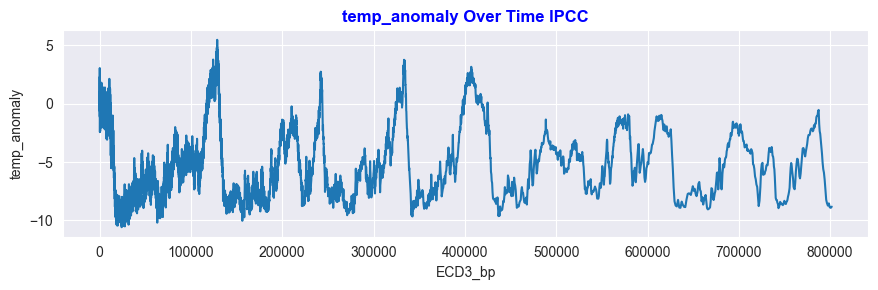

In [120]:
# Plotting temp anomaly against ECD3_bp

# Set the figure size
plt.figure(figsize=(9, 3))

# Create a line plot
sns.lineplot(x='ECD3_bp', y='temp_anomaly', data=temp_anomality_df)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('temp_anomaly')
plt.title('temp_anomaly Over Time IPCC', fontweight='bold', color='blue')

# Improve spacing for better aesthetics
plt.tight_layout()

# Display the plot
plt.show()

The DF is exported as CSV and Jason.

In [116]:
# Export to CSV
temp_anomality_df.to_csv('export\\co2-temp-ch4\\temp_anomality_df.csv', index=False)

# Export to JSON
temp_anomality_df.to_json('export\\co2-temp-ch4\\temp_anomality_df.json', orient='records')

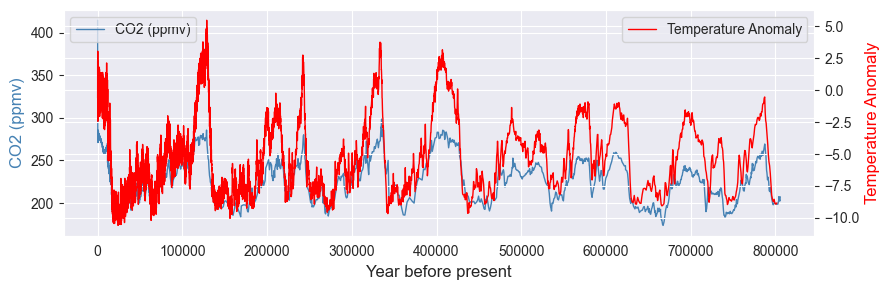

In [125]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a larger figure size
fig, ax = plt.subplots(figsize=(9, 3))

# Add the first line to the plot with a thinner line and no markers
ax.plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1, label='CO2 (ppmv)')

# Add x-axis label
ax.set_xlabel('Year before present', fontsize=12)

# Add y-axis label for the first y-axis
ax.set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)

# Create a legend for the first line
ax.legend(loc='upper left')

# Define the second y-axis that shares the x-axis with the current plot
ax2 = ax.twinx()

# Add the second line to the plot with a thinner line and no markers
ax2.plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomaly'], color=col2, linewidth=1, label='Temperature Anomaly')

# Add y-axis label for the second y-axis
ax2.set_ylabel('Temperature Anomaly', color=col2, fontsize=12)

# Create a legend for the second line
ax2.legend(loc='upper right')

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Define colors to use
col1 = 'steelblue'
col2 = 'red'

# Define subplots with a 2x1 grid and a smaller figure size
fig, axs = plt.subplots(2, 1, figsize=(8, 5))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

In [ ]:
temp_anomality_df

## 4. CH4

CH4 stands for methane, which is a greenhouse gas. It's a chemical compound with the molecular formula CH4. Methane is a significant component of the Earth's atmosphere and plays a crucial role in the greenhouse effect. It is released during the production and transport of coal, oil, and natural gas and is a potent greenhouse gas with a higher global warming potential than carbon dioxide over a shorter time frame.

The present section will fuse a dataset showing the CH4 level from 800,000 year to present and it will export it in csv and jason.

For the CH4 several dataset are provided [here []](https://www.methanelevels.org/#sources) and they can be combined to have express the CH4 mean (ppbv) from from 800,000 year to present.

### 4.1 From 800,000 to 1000

The dataset is provided from the [NOAA WEBISTE []](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc-ch4-2008.txt) and have been used to determine the value from up t0 1000 years ago.

The dataset contain Methane data from the EPICA Dome C ice core spans a period of 0 to 800 thousand years before present (kyr BP). The analysis involves extracting air from polar ice-core samples. The extracted gas is then analyzed for methane (CH4) using gas chromatography. 

It express the age as year before present, with present equal to 1950.

The following code will:
- import the dataframe from a csv file
- select only relevant columns and rename them
- create a column year showing the year in the common format
- create a column ECD3_bp showing the year before present where year is the current year
- reorder column 
- select only the relevant value to be fused 

In [136]:
# Import methane data from 800,000 to 1,000 years ago
epica_domec_800yr_ch4 = pd.read_csv("data\methane\edc-ch4-2008.txt", skiprows=153, sep='\s+')

# Remove unnecessary columns for better clarity 
epica_domec_800yr_ch4 = epica_domec_800yr_ch4[['Gas','Age']]

# Rename columns for clarity 
columns_to_rename = ['ECD3_age', 'CH4_ppb']
epica_domec_800yr_ch4.columns = columns_to_rename

# Define the current year
current_year = dt.date.today().year

# Add a column 'ECD3_bp' based on the year before present equal to 2023 
epica_domec_800yr_ch4['ECD3_bp'] = current_year - 1950 + epica_domec_800yr_ch4['ECD3_age']

# Add a column 'Year' to show the year referred to
epica_domec_800yr_ch4['Year'] = (current_year - epica_domec_800yr_ch4['ECD3_bp']).astype(int)

# Drop column 'ECD3_age' as redundant 
epica_domec_800yr_ch4 = epica_domec_800yr_ch4.drop(columns='ECD3_age')

# Reorder columns in the DataFrame 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
epica_domec_800yr_ch4 = epica_domec_800yr_ch4[['Year','ECD3_bp','CH4_ppb']]

# Sort by year 
epica_domec_800yr_ch4 = epica_domec_800yr_ch4.sort_values('Year', ascending=False)

# Keep values from 1,000 years ago onwards 
epica_domec_800yr_ch4 = epica_domec_800yr_ch4[24:]

The DF has no missing value, no duplicate value in the year column, 20279 rows and 2 columns

In [141]:
# Checking data shape
print("Dataset Shape:")
print(f'Rows {epica_domec_800yr_ch4.shape[0]}, Columns: {epica_domec_800yr_ch4.shape[1]}'"\n")

# Checking missing values
print("Missing Values")
print(epica_domec_800yr_ch4.isnull().sum(), "\n")

# Check for duplicates in the column 'year'
duplicate_in_year = epica_domec_800yr_ch4.duplicated(['Year'], keep=False)
print("Duplicate Values")
print(epica_domec_800yr_ch4[duplicate_in_year], "\n")

Dataset Shape:
Rows 2079, Columns: 3

Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 

Duplicate Values
Empty DataFrame
Columns: [Year, ECD3_bp, CH4_ppb]
Index: [] 



In [ ]:
# Check for duplicates in the column 'EDC3béta'
# https://www.statology.org/pandas-find-duplicates/
duplicate_in_year = noaa_temperature.duplicated(['EDC3béta'], keep=False)
print("Duplicate Values")
print(noaa_temperature[duplicate_in_year], "\n")

### 4.2 From 1000 to 1984

Data from 1000 to 1980 have been downloaded from the [noaa.gov website []](https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/law/law_ch4.txt) and have been provided from: Etheridge, D. M., Steele, L. P., Francey, R. J., and 
Langenfelds, R. L., 1998, Atmospheric methane between 1000 A.D. and present: 
Evidence of anthropogenic emissions and climatic variability 
J. Geophys. Res. Vol. 103, No. D13, p. 15,979 (98JD00923).

The dataset, dowloaded as **law_ch4.txt*, expressed the year in the common version but, for omegenity with the other dataset, we will need to calculate The year before present with present equal to the current year. 

As usaul, we will import the dataset, format and manipulate it to express only the needed values and extract the section to be fuse on the main datset. 

The columns ECD3_bp is also added, expressing the year before present with present equal to the corrent year. 


In [176]:
# Read the methane data from the specified file, skipping row 538
ch4_until1980 = pd.read_csv('data\methane\law_ch4.txt', skiprows= 538, nrows=131, sep='\s+')

# remve columns not needed from the df for better clarity 
# https://www.statology.org/pandas-keep-columns/
ch4_until1980 = ch4_until1980[['air','age']]

# Remove columns not needed from the DataFrame for better clarity
# https://www.statology.org/pandas-keep-columns/
ch4_until1980 = ch4_until1980[['air', 'age']]

# Rename columns for clarity
# columns_to_rename = ['Year', 'CH4_ppb']
ch4_until1980.columns = columns_to_rename

# Define the current year
current_year = dt.date.today().year
# Add a column 'ECD3_bp' based on the year before present equal to 2023 
ch4_until1980['ECD3_bp'] =  current_year - ch4_until1980['Year']

# Reorder columns in the DataFrame
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
ch4_until1980 = ch4_until1980[['Year', 'ECD3_bp', 'CH4_ppb']]

In [177]:
ch4_until1980

,Year,ECD3_bp,CH4_ppb
0,1010,1014,676.0
1,1020,1004,679.2
2,1030,994,682.0
3,1040,984,684.3
4,1050,974,685.8
...,...,...,...
126,1974,50,1449.3
127,1976,48,1481.5
128,1978,46,1514.0
129,1980,44,1547.1


Duplicate on the year column and missing volume have been checked. The dataset show now duplicate or missing volume showing consistency. The dataset contain 131 rows and 3 columns.

In [178]:
# check for duplicate in the columns ECD3_bp
duplicate_in_year = ch4_until1980.duplicated(['ECD3_bp'], keep=False)
print(ch4_until1980[duplicate_in_year],"\n")

# Checking data shape
print("Dataset Shape:")
print(f'Rows {ch4_until1980.shape[0]}, Columns: {ch4_until1980.shape[1]}', "\n")

# Checking missing values
print("Missing Values")
print(ch4_until1980.isnull().sum(), "\n")

Empty DataFrame
Columns: [Year, ECD3_bp, CH4_ppb]
Index: [] 

Dataset Shape:
Rows 131, Columns: 3 

Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 



### 4.3 From 1984 to 2022

The last dataset, called **ch4_annmean_gl.txt**, has been downloaded from the [noaa website []](https://gml.noaa.gov/ccgg/trends_ch4/).

It represents the mean concentration of CH4 per year from 1984 to 2022. The years are expressed in the common "YYYY" format. For the purpose of the analysis and for consistency with other datasets, I will add a column indicating the year before the present, with the current year as the reference.

The following code import the dataset as [dataframe []](https://stackoverflow.com/questions/66589600/how-to-read-in-a-txt-file-when-the-column-names-are-inline-with-the-data-with-p) and  remove columns not needed. 

In [181]:
# Read methane data from a text file covering the years 1980 to 2022
# https://stackoverflow.com/questions/66589600/how-to-read-in-a-txt-file-when-the-column-names-are-inline-with-the-data-with-p
noa_ch4_until2022 = pd.read_csv("data\methane\ch4_annmean_gl.txt", 
                                skiprows=46,  # Skip the initial 46 rows
                                sep='\s+',  # Use whitespace as the separator
                                names=['Year', 'CH4_ppb'])  # Set column names explicitly

# Remove columns not needed for better clarity
noa_ch4_until2022 = noa_ch4_until2022[['Year', 'CH4_ppb']]

The column 'ECD3_bp' is created showing the year before present as present equal to current year.

In [182]:
# define the current year
current_year = dt.date.today().year
# add columng age based on year before present equal to 2023 
noa_ch4_until2022['ECD3_bp'] =  current_year - noa_ch4_until2022['Year']
# reorder columns in the df 
# https://sparkbyexamples.com/pandas/pandas-change-the-order-of-columns/
noa_ch4_until2022 = noa_ch4_until2022[['Year','ECD3_bp','CH4_ppb']]

The dataset is exported as a [CSV []](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) and [Jason []](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_json.html) and placed in the folder export/co2-temp-ch4 folder. 

In [ ]:
# Export to CSV
co2_df.to_csv('export\co2-temp-ch4\co2_dataset.csv', index=False)

# Export to JSON
co2_df.to_json('export\co2-temp-ch4\co2_dataset.json', orient='records')

### 3.4 Fuse the dataset and export it as CSV and Jason 

Now that we have processed the three datasets, we can merge them together to create a comprehensive dataset representing methane (CH4) concentrations from 800,000 years ago to the present.

As all the three dataset have the same column we can concatenate them.

In [183]:
# Concatenate the three methane (CH4) datasets (epica_domec_800yr_ch4, ch4_until1980, noa_ch4_until2022)
# and create a comprehensive dataset 'full_ch4'. 
full_ch4 = pd.concat([epica_domec_800yr_ch4, ch4_until1980, noa_ch4_until2022], ignore_index=True, axis=0)

# Sort the dataset and reset the index
full_ch4 = full_ch4.sort_values(by="ECD3_bp", ascending=False).reset_index(drop=True)

The dataset contains 2249 rows and 3 columns, with no missing values or duplicates, indicating that the preprocessing of the three datasets was done correctly.

In [186]:
# Checking data shape
print(f'Rows {full_ch4.shape[0]}, Columns: {full_ch4.shape[1]}' "\n")

# Checking missing values
print("Missing Values")
print(full_ch4.isnull().sum(), "\n")

# Check for duplicates in the "year" column
duplicate_in_year = full_ch4['Year'].duplicated(keep=False)
print(full_ch4[duplicate_in_year])

Rows 2249, Columns: 3

Missing Values
Year       0
ECD3_bp    0
CH4_ppb    0
dtype: int64 

Empty DataFrame
Columns: [Year, ECD3_bp, CH4_ppb]
Index: []


We can examine the merged dataset by plotting a graph. From the graph below, as a first impression, it seems to follow the same trend as CO2 concentration and temperature anomalies. In fact, the graph shows a cyclic increasing and decreasing trend with a significant acceleration in recent years

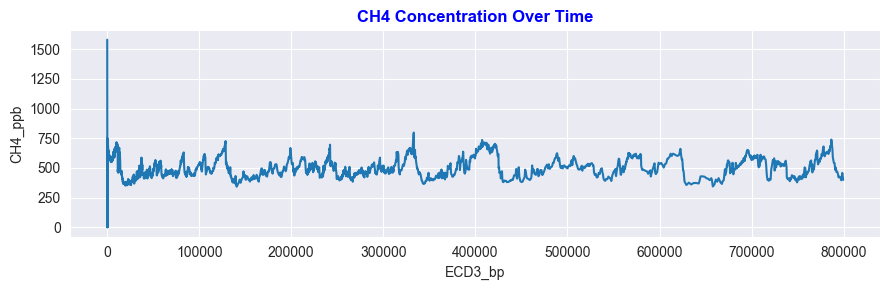

In [187]:
# plot the ch4 vs ECD3_bp

# Set the style
sns.set_style("darkgrid")

# Set the size of the figure
plt.figure(figsize=(9, 3))

# Create the line plot
sns.lineplot(x='ECD3_bp', y='CH4_ppb', data=full_ch4)

# Add labels and title
plt.xlabel('ECD3_bp')
plt.ylabel('CH4_ppb')
plt.title('CH4 Concentration Over Time', fontweight='bold', color='blue')

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

We can now export the dataset in csv and jason.

In [190]:
# Export to CSV
full_ch4.to_csv('export/co2-temp-ch4/full_ch4.csv', index=False)

# Export to JSON
full_ch4.to_json('export/co2-temp-ch4/full_ch4.json', orient='records')

In [ ]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'orange'

# Define subplots with a 3x1 grid and a smaller figure size
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_anomality_df['ECD3_bp'], temp_anomality_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Plot the third line on the third subplot (axs[2])
axs[2].plot(full_ch4['ECD3_bp'], full_ch4['CH4_ppb'], color=col3, linewidth=1)  # Change 'Column_X' to the desired column
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('CH4_ppb', color=col3, fontsize=12)  # Change 'Column_X Label' to the desired label
axs[2].set_title('CH4_ppb', fontsize=14)  # Change 'Column_X Title' to the desired title

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

# fuse the dataset 

The porpuse of this section is

In [ ]:
# group the co2_df dataset based on year to remove duplicate 
co2_df_to_merge = co2_df.groupby('Year')['CO2 (ppmv)'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
temp_anomality_df_to_merge = temp_anomality_df.groupby('Year')['temp_anomality'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
full_ch4_to_merge = full_ch4.groupby('Year')['CH4_ppb'].mean().reset_index()

In [ ]:
temp_anomality_df_to_merge

In [ ]:
# merge the dataframe on columns years 
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

# Merge temp df with co2 dataframe
temp_co2_df = temp_anomality_df_to_merge.merge(co2_df_to_merge, how='outer', on='Year').reset_index(drop=True)

# Merge temp_co2_df with ch4 df
temp_co2_ch4_df = temp_co2_df.merge(full_ch4_to_merge, how='outer', on='Year').reset_index(drop=True)

# Order df by years in descending order
temp_co2_ch4_df = temp_co2_ch4_df.sort_values('Year', ascending=False).reset_index(drop=True)

In [ ]:
temp_co2_ch4_df.head(100)


In [ ]:
# Interpolate NaN values using 'time' method
temp_co2_ch4_df.interpolate(method='linear', inplace=True)

# Reset the index if needed
temp_co2_ch4_df.reset_index(drop=True)

# Create a column ECD3_br to represent the year before present 
# define the current year
current_year = datetime.date.today().year

# add columng age based on year before present equal to 2023 
temp_co2_ch4_df['ECD3_bp'] =  current_year- temp_co2_ch4_df['Year']

#reorder columns 
temp_co2_ch4_df.reindex(columns=['Year',	'ECD3_bp', 'temp_anomality',	'CO2 (ppmv)',	'CH4_ppb'])

In [ ]:
temp_co2_ch4_df.to_csv('temp_co2_ch4_df.csv')

In [ ]:
# Define colors to use
col1 = 'steelblue'
col2 = 'red'
col3 = 'orange'

# Define subplots with a 3x1 grid and a smaller figure size
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot the first line on the first subplot (axs[0])
axs[0].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['CO2 (ppmv)'], color=col1, linewidth=1)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('CO2 (ppmv)', color=col1, fontsize=12)
axs[0].set_title('CO2 (ppmv)', fontsize=14)

# Plot the second line on the second subplot (axs[1])
axs[1].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['temp_anomality'], color=col2, linewidth=1)
axs[1].set_xlabel('Year', fontsize=12)
axs[1].set_ylabel('Temperature Anomaly', color=col2, fontsize=12)
axs[1].set_title('Temperature Anomaly', fontsize=14)

# Plot the third line on the third subplot (axs[2])
axs[2].plot(temp_co2_ch4_df['ECD3_bp'], temp_co2_ch4_df['CH4_ppb'], color=col3, linewidth=1)  # Change 'Column_X' to the desired column
axs[2].set_xlabel('Year', fontsize=12)
axs[2].set_ylabel('CH4_ppb', color=col3, fontsize=12)  # Change 'Column_X Label' to the desired label
axs[2].set_title('CH4_ppb', fontsize=14)  # Change 'Column_X Title' to the desired title

# Adjust layout to prevent clipping of labels
fig.tight_layout()

# Show the plot
plt.show()

# prediction 

https://datascience.stackexchange.com/questions/50829/predicting-yearly-income-with-linear-regression-using-python
https://www.nickmccullum.com/python-machine-learning/linear-regression-python/
https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
https://www.analyticsvidhya.com/blog/2022/06/time-series-forecasting-using-python/

In [ ]:
#import nasa dataset for consistency and affiidability of the prevision of modern era estimation 
# https://climate.nasa.gov/vital-signs/global-temperature/
# https://data.giss.nasa.gov/gistemp/graphs/graph_data/Global_Mean_Estimates_based_on_Land_and_Ocean_Data/graph.txt
# https://www.temperaturerecord.org/#sources

nasa_temp_anom_until_1880 = pd.read_csv('data\\Temperature\\nasa_until1880.txt', skiprows=3, sep='\s+', )
# drop first row 
# https://stackoverflow.com/questions/43136137/drop-a-specific-row-in-pandas
nasa_temp_anom_until_1880 = nasa_temp_anom_until_1880.drop(0).reset_index(drop=True)
# keep only relevant columns 
nasa_temp_anom_until_1880 = nasa_temp_anom_until_1880[['Year','No_Smoothing']] 
# rename columns
nasa_temp_anom_until_1880.columns=['Year','temp_anomaly']
nasa_temp_anom_until_1880['Year']=nasa_temp_anom_until_1880['Year'].astype(int)

nasa_temp_anom_until_1880



In [ ]:
# plot the CO2 (ppmv) vs Gasage (yr BP)

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the scatter plot with a regression line
# https://stackoverflow.com/questions/53257382/what-do-scatter-kws-and-line-kws-do-in-seaborn-lmplot
sns.regplot(x='Year', y='temp_anomaly', data=nasa_temp_anom_until_1880, scatter_kws={'s': 10}, label='Original Data', line_kws={'color': 'green'})


plt.xlabel('Year')
plt.ylabel('Temp anomaly')
plt.title('Temperature Anomaly Over Time', fontweight='bold', color='blue')
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt

# Assuming 'Year' and 'temp_anomaly' are the correct column names in your DataFrame
x = nasa_temp_anom_until_1880[['Year']]
y = nasa_temp_anom_until_1880['temp_anomaly']  # Removed extra brackets around 'temp_anomaly'

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=42)

# Create a linear regression model and fit it to the training data
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the test set
predictions = model.predict(x_test)

# Evaluate the regression model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, predictions, squared=False))





In [ ]:
# Create a DataFrame for future predictions
future_predictions_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Temp_Anomaly': predictions_future
})

future_predictions_df['Year'] = future_predictions_df['Year'].astype(int)



In [ ]:

# Set the size of the figure
plt.figure(figsize=(9, 5))

# Create the scatter plot for historical data without a regression line
sns.scatterplot(x='Year', y='temp_anomaly', data=nasa_temp_anom_until_1880, label='Original Data')

# Create a line plot for predicted data
sns.lineplot(x='Year', y='Predicted_Temp_Anomaly', data=future_predictions_df, label='Predicted Data', color='red')

plt.xlabel('Year')
plt.ylabel('Temp anomaly')
plt.title('Temperature Anomaly Over Time - prediction until 2060', fontweight='bold', color='blue')
plt.legend()

# Improve spacing
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
#from scipy.stats import pearsonr
x
# Interpolate CO2 values to match the length of temp_anomality_df
#co2_interpolated = np.interp(temp_anomality_df['ECD3_bp'], co2_df['ECD3_bp'], co2_df['CO2 (ppmv)'])

# Use temp_anomality_df directly for temp_anomality values
#temp_values = temp_anomality_df['temp_anomality'].values

#correlation_coefficient, p_value = pearsonr(co2_interpolated, temp_values)

#print(f"Pearson Correlation Coefficient: {correlation_coefficient}")
#print(f"P-value: {p_value}")

In [ ]:
# merge co2 and temperature dataset 
# group the co2_df dataset based on year to remove duplicate 
#co2_df = co2_df.groupby('Year')['CO2 (ppmv)'].mean().reset_index()
# group the temp_anomality_df dataset based on year to remove duplicate 
#temp_anomality_df = temp_anomality_df.groupby('Year')['temp_anomality'].mean().reset_index()

In [ ]:
# merge the co2 and temp dataset on "Year" performing a full join. This will create multiple nan
#co2_temp_composite = co2_df.merge(temp_anomality_df, how="outer", on='Year')
# recreate the column ECD3_bp for clarity
#co2_temp_composite['ECD3_bp'] = current_year - co2_temp_composite['Year']
# reorder columns
#co2_temp_composite = co2_temp_composite[['Year', 'ECD3_bp',	'CO2 (ppmv)', 'temp_anomality']]
# sort by year 
#co2_temp_composite = co2_temp_composite.sort_values('Year', ascending=False).reset_index(drop=True)